# Principal Component Analysis (PCA)
An important machine learning method for dimensionality reduction is called Principal Component Analysis.

It is a method that uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

## MNIST DATASET
To implement svm classifier in Python, we are going to use the one of most popular classification dataset which is MNIST dataset.we'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise



In [33]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<img src="https://cdn-images-1.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png" width='50%' height='10%'>

## Import the Libraries

In [52]:
## import the libraries..## impo 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

Create the Datatset: We use the MNIST dataset

In [53]:
# import the MNIST dataset from sklearn.datasets.load_disgits 
from sklearn.datasets import load_digits

In [54]:
## Store the dataset which is used further.## Stor 
digits=load_digits()

By seeing the shape of dataset we can see there is 1797 differnet kind of handwriting digits are present with 64 features.

In [55]:
# To check the shape of dataset use.shape()# 
print "shape of dataset"
print(digits.data.shape)

shape of dataset
(1797L, 64L)


Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. 



#### each digits in the datasets are of 8x8 image

plotting of some images of digits in 8x8 matrix


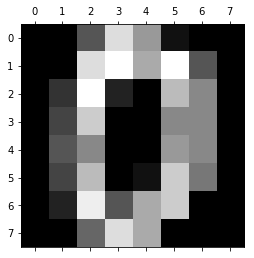

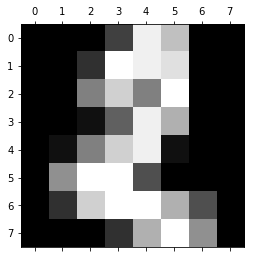

In [56]:
print "plotting of some images of digits in 8x8 matrix"
plt.gray() 
plt.matshow(digits.images[0]) 
plt.matshow(digits.images[2])
plt.show() 

Print the keys 

In [57]:
print digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']


In [58]:
# Strore the features of Mnist dataset into X
X=np.array(digits.data)

In [59]:
print "features data of MNIST dataset"
X

features data of MNIST dataset


array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [60]:
# Store the target Mnist values into Y
y=np.array(digits.target)

In [61]:
print "target data of MNIST dataset"
y

target data of MNIST dataset


array([0, 1, 2, ..., 8, 9, 8])

### Feature Scaling by StandardScaler
Standardize features is done  by removing the mean and scaling to unit variance.PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Standardizing the features
X = StandardScaler().fit_transform(X)

In [64]:
X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### Train_Test_split
we are splitting dataset into training data and testing data. Training data is used for to train the model and then testing of model with test data. This train_test_split available in sklearn.cross_validation

In [65]:
## To Split the dataset into training and testing sets import train_test_split
from sklearn.model_selection import train_test_split

In [66]:
# breaking dataset as train and test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=42)

### Import and Apply PCA

PCA has .95 for the number of components parameter.It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [67]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

Fit PCA on training set only...

In [68]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We can find out how many components PCA choose after fitting the model using pca.n_components_ . In this case, 95% of the variance amounts to 39 principal components.

In [69]:
pca.n_components_

39

### Apply the mapping (transform) to both the training set and the test set.

In [70]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

### Apply Logistic Regression to the Transformed Data

Import the model

In [71]:
from sklearn.linear_model import LogisticRegression

Make an instance of the Model.

In [72]:
clf=LogisticRegression(solver = 'liblinear')

Training the model on the data.
Model is learning the relationship between digits and labels

In [73]:
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predict the labels of new data (new images)

In [74]:
pred=clf.predict(x_test)

In [75]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Model Performance

In [76]:
accuracy_score(y_test,pred)

0.96105702364394996

### Confusion matrix 

In [78]:
confusion_matrix(y_test,pred)

array([[67,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 67,  2,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 66,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 65,  0,  0,  0,  2,  3,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 80,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 68,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 70,  0,  0],
       [ 0,  4,  0,  0,  0,  1,  0,  0, 59,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  3, 71]], dtype=int64)

### Classification_report

In [79]:
print classification_report(y_test,pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        67
          1       0.93      0.93      0.93        72
          2       0.97      1.00      0.99        66
          3       0.98      0.92      0.95        71
          4       0.99      1.00      0.99        78
          5       0.96      0.96      0.96        83
          6       0.99      0.99      0.99        69
          7       0.96      0.99      0.97        71
          8       0.87      0.91      0.89        65
          9       0.96      0.92      0.94        77

avg / total       0.96      0.96      0.96       719

